# Projet: Analyse prédictive des défauts de paiement

## Contexte
Dans un contexte économique mondial marqué par une incertitude croissante, les institutions financières sont confrontées à un défi de taille : évaluer avec précision la capacité de remboursement des emprunteurs. L'augmentation des défauts de paiement peut non seulement fragiliser les portefeuilles de prêts, mais aussi engendrer des risques systémiques pour l'ensemble du secteur financier. Ainsi, la nécessité de disposer d'outils robustes pour prédire les défauts de paiement devient primordiale.

Ce rapport présente une étude approfondie sur l'analyse prédictive des défauts de paiement, visant à améliorer les stratégies de gestion des risques des établissements financiers. En s'appuyant sur des techniques avancées de machine learning, ce projet explore différents modèles pour identifier les emprunteurs susceptibles de ne pas honorer leurs engagements financiers. L'objectif est double : d'une part, minimiser les pertes pour les prêteurs en détectant les risques de défaut en amont, et d'autre part, permettre une allocation plus efficiente des ressources financières.

Dans ce rapport, nous décrirons les données utilisées, les méthodes employées pour entraîner et évaluer les modèles prédictifs, ainsi que les résultats obtenus. 

# 1. Jeu de données et analyse exploratoire

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
df = pd.read_csv("Loan_default.csv")
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [4]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [5]:
# description des différentes colonnes
cols = {"Colonne":['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'], "Description": ["Id unique client", "âge", "revenu annuel", "montant du crédit", 
        "score de crédit qui indique la capacité de remboursement de l'emprunteur",
        "nombre de mois de travail", "nombre de crédits déjà en cours", 
        "taux d'intérêt du crédit", "nombre de mois de remboursement du crédit",
       "ratio dette/revenu", "niveau d'études", "type d'emploi",  "statut marital","hypothèque", 
        "personnes à charge", "objet du prêt", "co-signataire", "défauts de paiement"]}

description_colonnes = pd.DataFrame(cols)
description_colonnes

,Colonne,Description
0,LoanID,Id unique client
1,Age,âge
2,Income,revenu annuel
3,LoanAmount,montant du crédit
4,CreditScore,score de crédit qui indique la capacité de rem...
5,MonthsEmployed,nombre de mois de travail
6,NumCreditLines,nombre de crédits déjà en cours
7,InterestRate,taux d'intérêt du crédit
8,LoanTerm,nombre de mois de remboursement du crédit
9,DTIRatio,ratio dette/revenu


In [6]:
# taille du dataset
print("le jeu de données contient", df.shape[0], "lignes et", df.shape[1], "colonnes")

le jeu de données contient 255347 lignes et 18 colonnes


In [7]:
# valeurs manquantes
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
# doublons
df.duplicated().sum()

0

In [9]:
# vérification des Dtype des colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [10]:
# segmentation de la colonne "CreditScore" 
   # Poor: 300 to 579
   # Fair: 580 to 669
   # Good: 670 to 739
   # Very good: 740 to 799
   # Excellent: 800 to 850

In [11]:
df['ScoreSegment'] = pd.cut(df['CreditScore'], 
                              bins=[300, 579, 669, 739, 799, 850],
                              labels=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])

In [12]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,ScoreSegment
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Poor
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Poor
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,Poor
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,Very good
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0,Poor
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1,Poor
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0,Fair
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0,Excellent


## Boxplots des variables

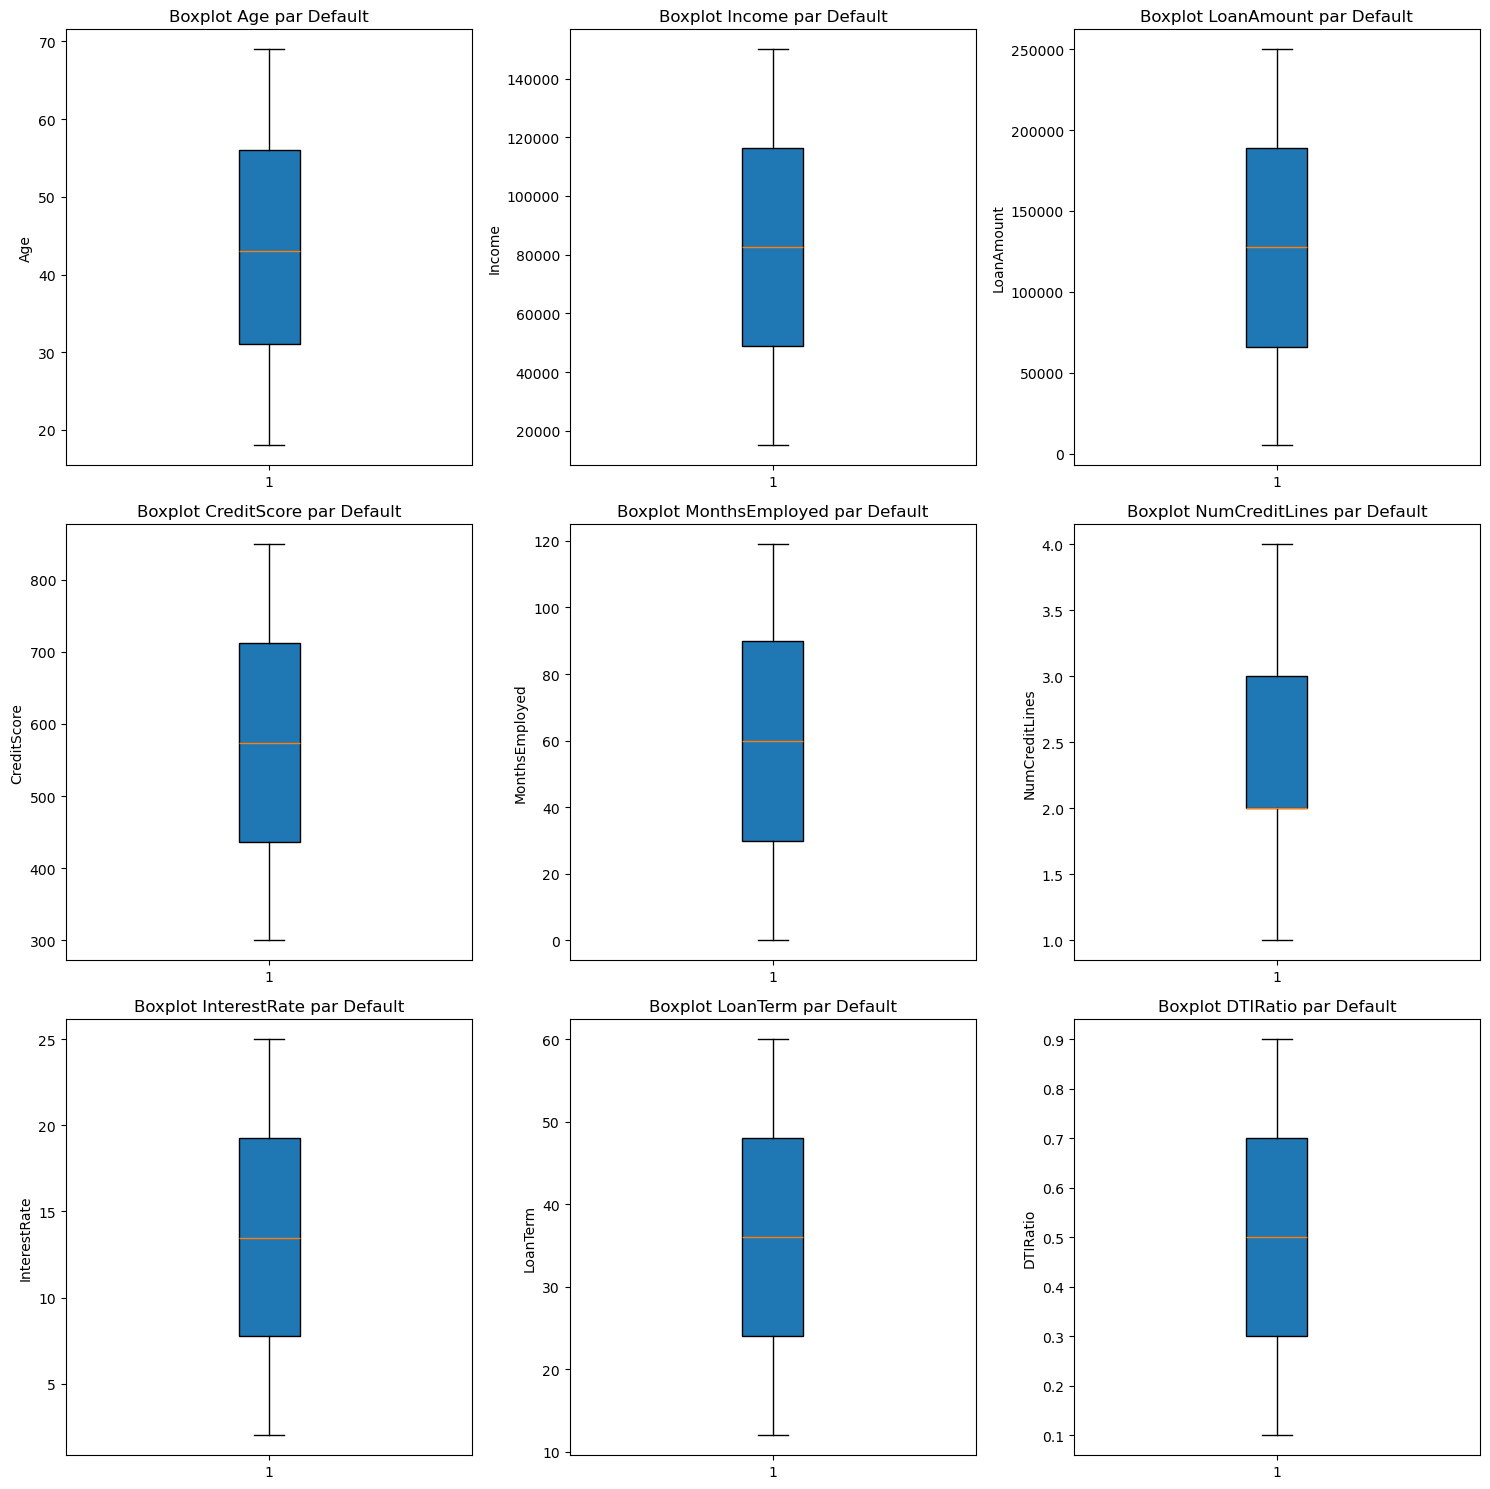

In [13]:
# évaluation des outliers par des boxplots 

def plot_boxplots(df):
    # Sélectionner uniquement les colonnes numériques
    num_cols = df.select_dtypes(include='number').columns
    
    # Créer les subplots
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()  # Aplatir les axes pour itérer facilement
    
    # suppression de la colonne "default"
    num_cols = num_cols.drop("Default")
    
    # Boucle sur chaque colonne pour créer un boxplot
    for i, col in enumerate(num_cols):
        axes[i].boxplot(df[col], vert=True, patch_artist=True)
        axes[i].set_title(f'Boxplot {col} par Default')
        axes[i].set_ylabel(col)
    
    # Ajuster l'espace entre les subplots
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
plot_boxplots(df)

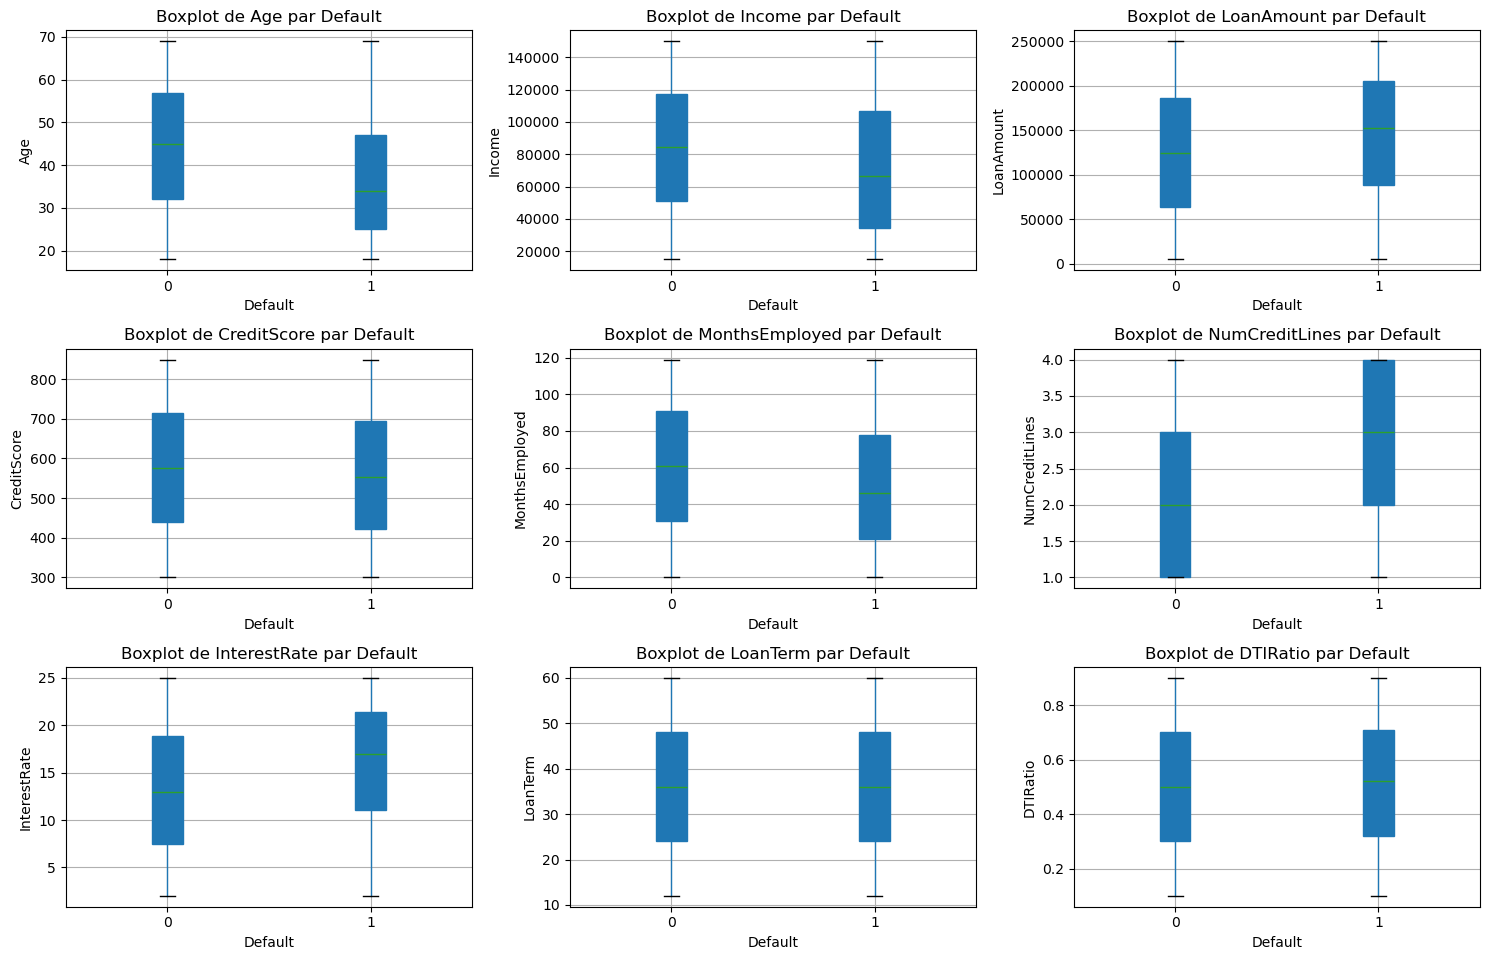

In [14]:
# Distribution des variables numériques par classes de la variable cible "Default"

def plot_boxplots_by_default(df, target_col='Default'):
    # Sélectionner uniquement les colonnes numériques
    num_cols = df.select_dtypes(include='number').columns.drop(target_col)
    
    # Créer les subplots
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    axes = axes.flatten()  # Aplatir les axes pour une itération facile
    
    # Boucle sur chaque colonne pour créer un boxplot en fonction de la colonne 'Default'
    for i, col in enumerate(num_cols):
        df.boxplot(column=col, by=target_col, ax=axes[i], patch_artist=True)
        axes[i].set_title(f'Boxplot de {col} par {target_col}')
        axes[i].set_xlabel(target_col)
        axes[i].set_ylabel(col)
    
    # Ajuster l'espace entre les subplots
    plt.tight_layout()
    plt.suptitle('')  # Supprimer le titre automatique de subplots
    plt.show()

# Exemple d'utilisation
plot_boxplots_by_default(df, target_col='Default')


## Analyses descriptive des variables numériques

In [15]:
# séparation des variables en numériques et catégorielles
num_df = df.select_dtypes(include=['number'])
cat_df = df.select_dtypes(exclude=['number'])
cat_df = cat_df.drop("LoanID", axis=1)

In [16]:
# Analyse descriptive des variables numériques
round(num_df.describe(), 2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00
mean,43.50,82499.30,127578.87,574.26,59.54,2.50,13.49,36.03,0.50,0.12
std,14.99,38963.01,70840.71,158.90,34.64,1.12,6.64,16.97,0.23,0.32
min,18.00,15000.00,5000.00,300.00,0.00,1.00,2.00,12.00,0.10,0.00
25%,31.00,48825.50,66156.00,437.00,30.00,2.00,7.77,24.00,0.30,0.00
50%,43.00,82466.00,127556.00,574.00,60.00,2.00,13.46,36.00,0.50,0.00
75%,56.00,116219.00,188985.00,712.00,90.00,3.00,19.25,48.00,0.70,0.00
max,69.00,149999.00,249999.00,849.00,119.00,4.00,25.00,60.00,0.90,1.00


## Analyses descriptive des variables catégorielles

In [17]:
# Analyse descriptive des variables catégorielles
cat_df.describe()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,ScoreSegment
count,255347,255347,255347,255347,255347,255347,255347,254863
unique,4,4,3,2,2,5,2,5
top,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,Poor
freq,64366,64161,85302,127677,127742,51298,127701,129739


In [18]:
# vérification des erreurs dans les variables catégorielles
for variable in cat_df:
    print(round(cat_df[variable].value_counts(normalize = True)*100, 2))
    print("**"*25)

Education
Bachelor's     25.21
High School    25.03
Master's       24.88
PhD            24.88
Name: proportion, dtype: float64
**************************************************
EmploymentType
Part-time        25.13
Unemployed       25.00
Self-employed    24.95
Full-time        24.93
Name: proportion, dtype: float64
**************************************************
MaritalStatus
Married     33.41
Divorced    33.30
Single      33.29
Name: proportion, dtype: float64
**************************************************
HasMortgage
Yes    50.0
No     50.0
Name: proportion, dtype: float64
**************************************************
HasDependents
Yes    50.03
No     49.97
Name: proportion, dtype: float64
**************************************************
LoanPurpose
Business     20.09
Home         20.08
Education    19.97
Other        19.94
Auto         19.91
Name: proportion, dtype: float64
**************************************************
HasCoSigner
Yes    50.01
No     49.99
Name: 

## Correlations entre les variables

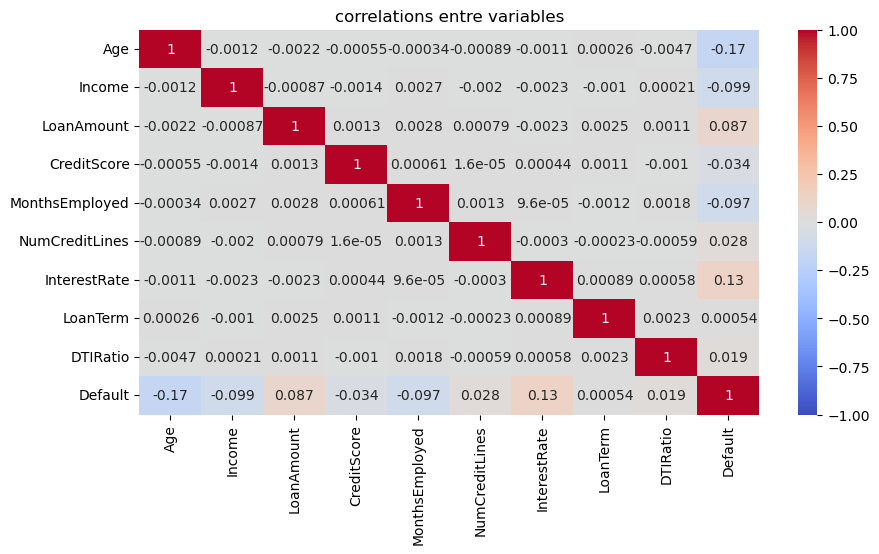

In [19]:
# tableau de correlation
correlations = num_df.corr()
plt.figure(figsize = (10,5))
plt.title("correlations entre variables")
sns.heatmap(correlations, vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm');

# 2. Machine Learning

In [20]:
# importation des packages
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter


from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import xgboost as XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

## Preprocessing

In [21]:
# séparation des vriables
X = df.drop(["Default", "LoanID"], axis =1)
y = df["Default"]

In [22]:
# Encodage des variables catégorielles
X_cat_cols = X.select_dtypes(include=['object', 'category']).columns

le = LabelEncoder()
X[X_cat_cols] = X[X_cat_cols].apply(le.fit_transform)

In [23]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,ScoreSegment
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,3
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,3
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,3
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,4
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0,3
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0,3
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,1,1,1,0,1,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,2,1,1,4,0,0


In [24]:
# séparation des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [25]:
# standardisation des variables
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Features importances

### Modèle Random Forest pour les features importances

In [26]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

score_rf_train = rf.score(X_train_scaled, y_train)
score_rf_test = rf.score(X_test_scaled, y_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print ("score_rf_train =", score_rf_train, "\n")
print("score_rf_test =", score_rf_test, "\n")
print("accuracy_score_rf:", accuracy_rf_test, "\n")
print("matrice de confusion")
print(cm_rf, "\n")
print("Rapport de classification:")
print(classification_report(y_test, y_pred_rf))

score_rf_train = 0.9999608374902705 

score_rf_test = 0.8850988838848639 

accuracy_score_rf: 0.8850988838848639 

matrice de confusion
[[44946   182]
 [ 5686   256]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45128
           1       0.58      0.04      0.08      5942

    accuracy                           0.89     51070
   macro avg       0.74      0.52      0.51     51070
weighted avg       0.85      0.89      0.84     51070



### Sélection des variables importantes

In [27]:
# Features importances: ici nous allons utiliser notre premier modèle de random forest pour selectionner uniquement 
# les varaibles les plus importantes

feature_importances = rf.feature_importances_
feature_importances = pd.DataFrame({"features": X_train.columns, "importance": feature_importances})
feature_importances.sort_values(by = ["importance"], ascending = False )

,features,importance
1,Income,0.129559
6,InterestRate,0.123218
2,LoanAmount,0.117313
0,Age,0.098282
3,CreditScore,0.098208
4,MonthsEmployed,0.096331
8,DTIRatio,0.087859
14,LoanPurpose,0.037754
7,LoanTerm,0.037752
5,NumCreditLines,0.030672


In [28]:
X_train = X_train.drop(["MaritalStatus", "ScoreSegment", "HasMortgage", "HasDependents", "HasCoSigner"], axis =1)
X_test = X_test.drop(["MaritalStatus", "ScoreSegment", "HasMortgage", "HasDependents", "HasCoSigner"], axis =1)

### Evaluation de l'échantillonnage des données d'entrainement et de test

In [29]:
# matrice de confusion du modèle rf
print("matrice de confusion")
print(cm_rf)

matrice de confusion
[[44946   182]
 [ 5686   256]]


In [30]:
# Evaluation de la proportion de distribution des classes de notre variable cible y:

print("Distribution des classes dans y_train:")
print(y_train.value_counts(normalize=True))

print("\n Distribution des classes dans y_test:")
print(y_test.value_counts(normalize=True))

Distribution des classes dans y_train:
Default
0    0.883927
1    0.116073
Name: proportion, dtype: float64

 Distribution des classes dans y_test:
Default
0    0.88365
1    0.11635
Name: proportion, dtype: float64


In [31]:
# application de SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Distribution après SMOTE : {Counter(y_train_resampled)}")
# A présent la proportion des deux classes est équivalente

Distribution après SMOTE : Counter({0: 180566, 1: 180566})


In [32]:
# variables d'entrainement définitives
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
y_train = y_train_resampled

X_test_scaled = scaler.transform(X_test)

## Modèles

### Modèle Random Forest

In [33]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Affichage des métriques
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("accuracy_score_rf:", accuracy_score_rf)
print("mse_rf:", mse_rf)
print("precision_rf:", precision_rf)
print("recall_rf:", recall_rf)
print("f1_score_rf", f1_score_rf)

accuracy_score_rf: 0.8300372038378696
mse_rf: 0.16996279616213042
precision_rf: 0.2461053412462908
recall_rf: 0.22332547963648602
f1_score_rf 0.23416269631198164


### Modèle Decision tree

In [34]:
# arbre de décision
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Affichage des métriques
accuracy_score_dt = accuracy_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)

print("accuracy_score_dt:", accuracy_score_dt)
print("mse_dt:", mse_dt)
print("precision_dt:", precision_dt)
print("recall_dt:", recall_dt)
print("f1_score_dt", f1_score_dt)

accuracy_score_dt: 0.7512433914235364
mse_dt: 0.24875660857646367
precision_dt: 0.17515372790161415
recall_dt: 0.3067990575563783
f1_score_dt 0.22299694189602445


### Modèle XGBoost

In [35]:
# xgboost
xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

# Affichage des métriques
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)

print("accuracy_score_xgb:", accuracy_score_xgb)
print("mse_xgb:", mse_xgb)
print("precision_xgb:", precision_xgb)
print("recall_xgb:", recall_xgb)
print("f1_score_xgb", f1_score_xgb)

accuracy_score_xgb: 0.8602310554141375
mse_xgb: 0.13976894458586253
precision_xgb: 0.31690140845070425
recall_xgb: 0.17418377650622685
f1_score_xgb 0.22480451781059949


## Evaluation des modèles

### AUC (l'aire sous la courbe)

In [36]:
# Prédiction des probabilités pour la classe 1
y_probs_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Calcul des valeurs FPR(False Positive Rate) et TPR(True Positive Rate) pour différents seuils
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_probs_rf)

# Calculer l'AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)


y_probs_dt = dt.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)


y_probs_xgb = xgb.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

print("roc_auc_rf:", roc_auc_rf)
print("roc_auc_dt:", roc_auc_dt)
print("roc_auc_xgb:", roc_auc_xgb)

roc_auc_rf: 0.685367694306202
roc_auc_dt: 0.5582811986948706
roc_auc_xgb: 0.7009348732482306


### Tableau des métriques

In [38]:
# création d'un tableau récapitulatif des métriques obtenus

# Initialisation d'un DataFrame vide
metrics_table = pd.DataFrame(columns=['Modèle', 'Précision', 'Rappel', 'F1-score', 'AUC-ROC', 'Accuracy', 'MSE'])

# Modèles
models = {"Decision Tree": dt, "Random Forest": rf, "XGBoost": xgb}

# Liste pour stocker les DataFrames intermédiaires
rows = []

# Calcul des métriques pour chaque modèle
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcul des métriques
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Créer un DataFrame pour cette ligne
    row = pd.DataFrame([{
        'Modèle': model_name,
        'Précision': precision,
        'Rappel': recall,
        'F1-score': f1,
        'AUC-ROC': auc_roc,
        'Accuracy': accuracy,
        'MSE': mse
    }])
    
    # Ajouter à la liste des lignes
    rows.append(row)

# Concaténer toutes les lignes ensemble
metrics_table = pd.concat(rows, ignore_index=True)

# tableau final
metrics_table

,Modèle,Précision,Rappel,F1-score,AUC-ROC,Accuracy,MSE
0,Decision Tree,0.175154,0.306799,0.222997,0.558281,0.751243,0.248757
1,Random Forest,0.246105,0.223325,0.234163,0.685368,0.830037,0.169963
2,XGBoost,0.316901,0.174184,0.224805,0.700935,0.860231,0.139769


### Matrices de confusion

In [40]:
# Matrices de confusion

print("matrice de confusion random forest")
print(confusion_matrix(y_test, y_pred_rf))

print("\n matrice de confusion svc")
print(confusion_matrix(y_test, y_pred_dt))

print("\n matrice de confusion xgboost")
print(confusion_matrix(y_test, y_pred_xgb))

matrice de confusion random forest
[[41063  4065]
 [ 4615  1327]]

 matrice de confusion svc
[[36543  8585]
 [ 4119  1823]]

 matrice de confusion xgboost
[[42897  2231]
 [ 4907  1035]]


### Interprétation du modèle le plus performant: XGBoost

In [41]:
import shap

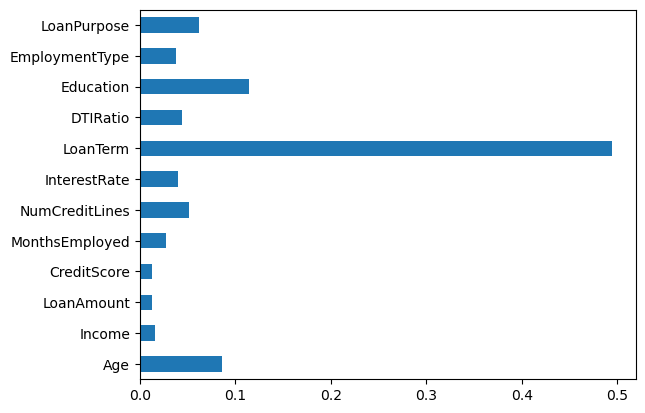

In [52]:
feature_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feature_importances.plot(kind='barh');

In [42]:
# les varaibles les plus importantes

feature_importances = rf.feature_importances_
feature_importances = pd.DataFrame({"features": X_train.columns, "importance": feature_importances})
feature_importances.sort_values(by = ["importance"], ascending = False )

,features,importance
7,LoanTerm,0.494703
9,Education,0.114637
0,Age,0.086066
11,LoanPurpose,0.061899
5,NumCreditLines,0.051505
8,DTIRatio,0.044234
6,InterestRate,0.039504
10,EmploymentType,0.038041
4,MonthsEmployed,0.027689
1,Income,0.016167


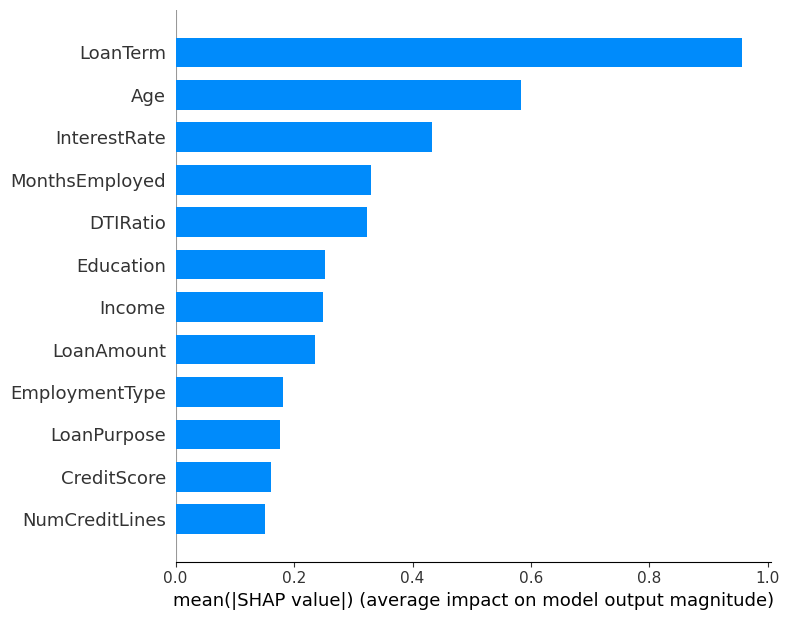

In [45]:
# SHAP pour le modèle xgboost en bar plot
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, plot_type="bar")

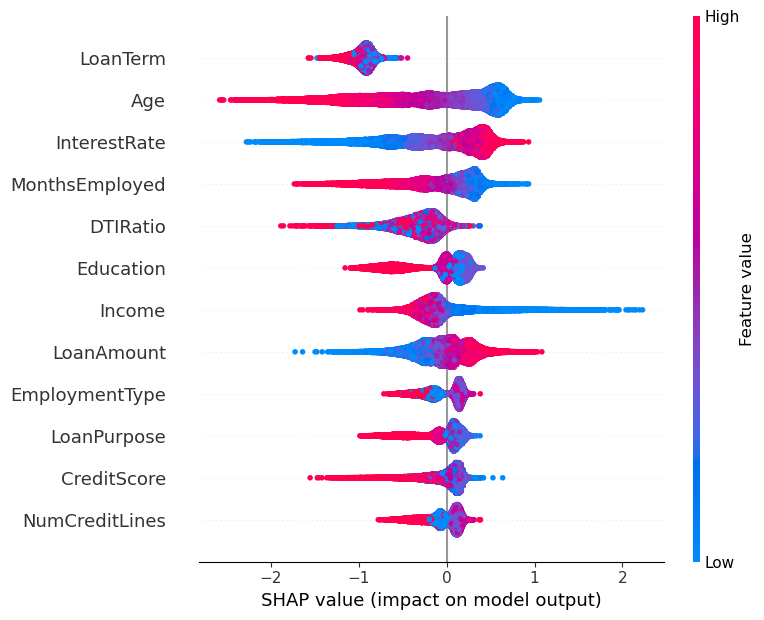

In [46]:
# SHAP pour le modèle xgboost
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

### Recommandations

## Optimisation de la précision des modèles

In [ ]:
# optimisation des hyperparamètres random forest

param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres dans la forêt
    'max_depth': [10, 20, 30],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un noeud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis pour être à une feuille
}

grid_rf = GridSearchCV(rf, param_grid, refit=True, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)
print("Meilleurs paramètres trouvés par GridSearchCV:")
print(grid.best_params_)

best_grid_rf = grid_rf.best_estimator
y_pred_rf = best_grid_rf.predict(X_test_scaled)

# Affichage des métriques
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("accuracy_score_rf:", accuracy_score_rf)
print("mse_rf:", mse_rf)
print("precision_rf:", precision_rf)
print("recall_rf:", recall_rf)
print("f1_score_rf", f1_score_rf)

In [ ]:
# optimisation des hyperparamètres xgboost

xgb = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans le modèle
    'max_depth': [3, 6, 10],  # Profondeur maximale de l'arbre
    'learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'subsample': [0.8, 1.0],  # Proportion d'échantillons utilisés pour entraîner chaque arbre
    'colsample_bytree': [0.8, 1.0],  # Proportion de caractéristiques utilisées pour entraîner chaque arbre
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 1],  # L1 regularization term on weights (Lasso)
    'reg_lambda': [1, 1.5, 2]  # L2 regularization term on weights (Ridge)
}

grid_xgb = GridSearchCV(xgb, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1, scoring='accuracy')
grid_xgb.fit(X_train_scaled, y_train)

print("Meilleurs paramètres trouvés par GridSearchCV:")
print(grid_xgb.best_params_)

best_grid_xgb = grid_xgb.best_estimator
y_pred_xgb = best_grid_xgb.predict(X_test)

# Affichage des métriques
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)

print("accuracy_score_xgb:", accuracy_score_xgb)
print("mse_xgb:", mse_xgb)
print("precision_xgb:", precision_xgb)
print("recall_xgb:", recall_xgb)
print("f1_score_xgb", f1_score_xgb)